In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("data/music_genre_classification.csv")
X = df.drop('label',axis=1)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)
pd.set_option('display.max_columns',100)
df.head()

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,1,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,2,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,3,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,4,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


<AxesSubplot:xlabel='spectral_bandwidth', ylabel='Density'>

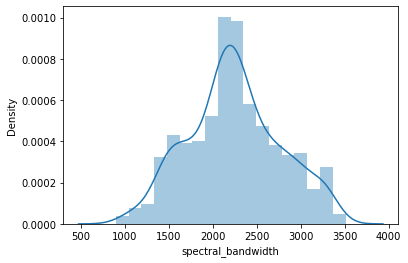

In [2]:
bandwidth = X_train['spectral_bandwidth']
sns.distplot(bandwidth)

##### The average bandwidth is between 2000 to 2500

<AxesSubplot:xlabel='zero_crossing_rate', ylabel='Density'>

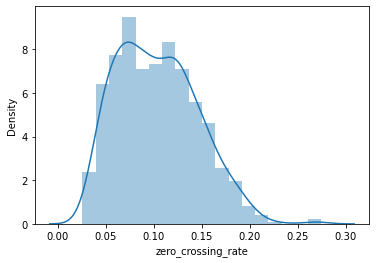

In [3]:
zc_rate = X_train['zero_crossing_rate']
sns.distplot(zc_rate)

####  In the zero_crossing_rate we can see that most of the waveform lies between 0.05 - 0.1

<AxesSubplot:xlabel='spectral_centroid', ylabel='Density'>

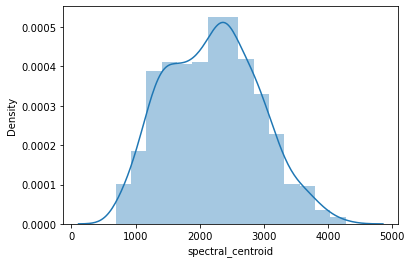

In [4]:
centroid = X_train['spectral_centroid']
sns.distplot(centroid)

#### In spectral_centroid the most of the frequncy lies between 2000-3000

#### Scaling

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

0.8433333333333334


In [6]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print(accuracy_lr)

0.8433333333333334


In [8]:
sc  =SVC(random_state=9)
sc.fit(X_train,y_train)
y_pred_sc = sc.predict(X_test)
accuracy_sc = accuracy_score(y_test,y_pred_sc)
print("SVC accuracy",accuracy_sc)

SVC accuracy 0.8366666666666667


In [9]:
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Random Forest accuracy",accuracy_rf)

Random Forest accuracy 0.9233333333333333


In [17]:
bagging_clf = BaggingClassifier(base_estimator=lr,n_estimators=50,max_samples=100,bootstrap=True,random_state=9)
bagging_clf.fit(X_train,y_train)
y_pred_bag = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_bag)
print("Bagging accuracy",accuracy)

Bagging accuracy 0.7966666666666666


In [16]:
nv = GaussianNB()
nv.fit(X_train,y_train)
voting_clf_soft = VotingClassifier(estimators=[('lr',lr),('rf',rf),('nv',nv)],voting='soft')
voting_clf_soft.fit(X_train,y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test,y_pred_soft)
print("Voting accuracy",accuracy_soft)

Voting accuracy 0.8933333333333333


In [18]:
RandomForestClassifier()
n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [26]:
parameters = {
    'n_estimators':[150,200,250],
    'max_depth':[10,20,30],
    'min_samples_leaf':[1,2]
}

In [28]:
grid = GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=6,verbose=2)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:   21.0s finished


0.92


In [29]:
grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 150}